## How to manipulate data instead of using SQL

In [ ]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import getpass # to get the password without it being visible
password = getpass.getpass()

········


In [3]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)

In [4]:
statuses=pd.read_sql_query('''select l.status, t.date,
count(distinct t.account_id) as noofaccounts,
count(distinct t.trans_id) as nooftrans,
sum(t.amount) as movedamount 
from trans t
join disp d using (account_id) 
join loan l using (account_id) 
where d.type = 'OWNER'
group by l.status, t.date''',engine)

In [22]:
statuses.head()

,status,date,noofaccounts,nooftrans,movedamount,M-Y,statusgroup
0,A,930114,2,2,45749.0,9301,good loans
1,A,930117,1,1,1100.0,9301,good loans
2,A,930119,1,1,700.0,9301,good loans
3,A,930124,1,1,900.0,9301,good loans
4,A,930125,1,1,900.0,9301,good loans


In [6]:
statuses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7615 entries, 0 to 7614
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status        7615 non-null   object 
 1   date          7615 non-null   int64  
 2   noofaccounts  7615 non-null   int64  
 3   nooftrans     7615 non-null   int64  
 4   movedamount   7615 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 297.6+ KB


In [7]:
#Extract month and year from date field (convert to string first)

statuses['date'] = statuses['date'].astype(str)

statuses['M-Y'] = statuses[str('date')].str[:4]

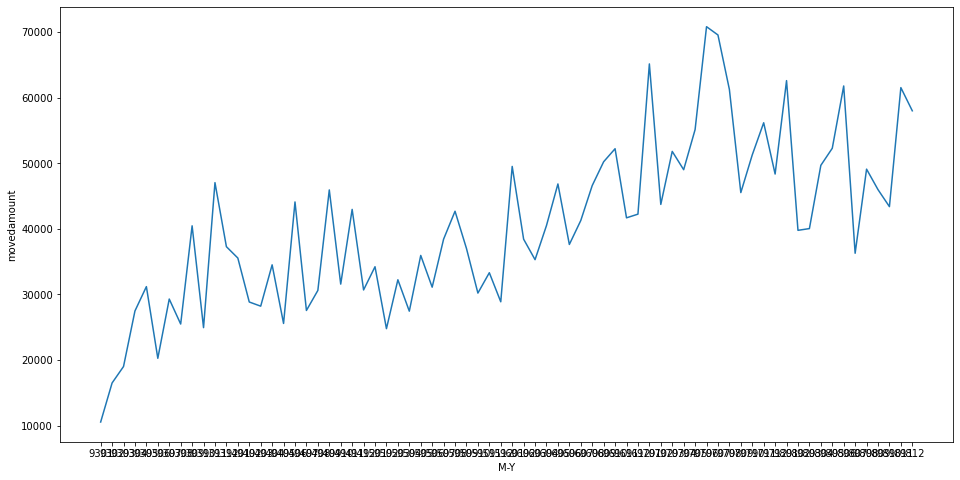

In [13]:
b_status = statuses.query("status == 'B'")
fig = plt.figure(figsize = (16, 8))
sns.lineplot(data = b_status, x = 'M-Y', y = 'movedamount', ci = None);

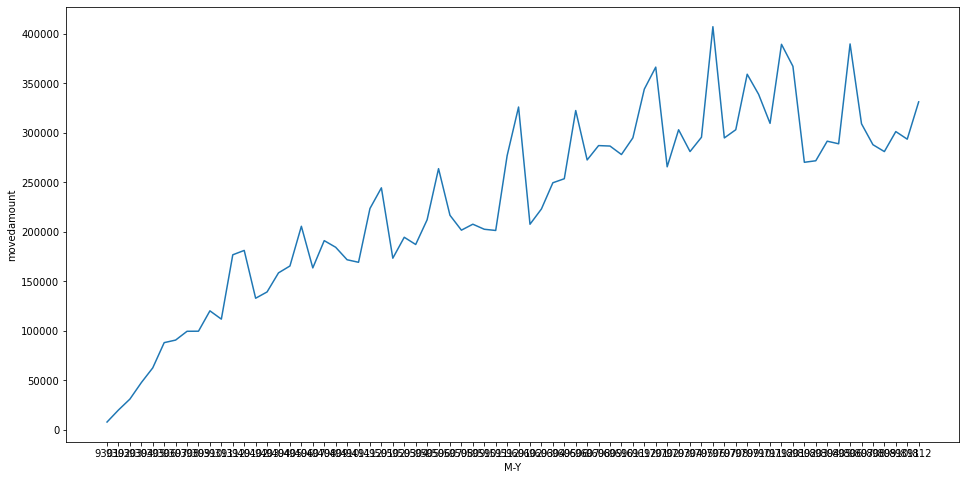

In [16]:
a_status = statuses.query("status == 'A'")
fig = plt.figure(figsize = (16, 8))
sns.lineplot(data = a_status, x = 'M-Y', y = 'movedamount', ci = None);

In [17]:
# group the loan statuses - create function

def statusgroup(x):
    if x in ['B', 'D']:
        return 'bad loans'
    else:
        return 'good loans'

In [21]:
# apply grouping function
statuses['statusgroup'] = list(map(statusgroup, statuses['status']))

In [23]:
# create a group by df
grouped = statuses.groupby(['M-Y', 'statusgroup'])['nooftrans'].sum()
grouped.head(10)

M-Y   statusgroup
9301  bad loans        3
      good loans      10
9302  bad loans        3
      good loans      42
9303  bad loans       13
      good loans      86
9304  bad loans       18
      good loans     127
9305  bad loans       27
      good loans     182
Name: nooftrans, dtype: int64

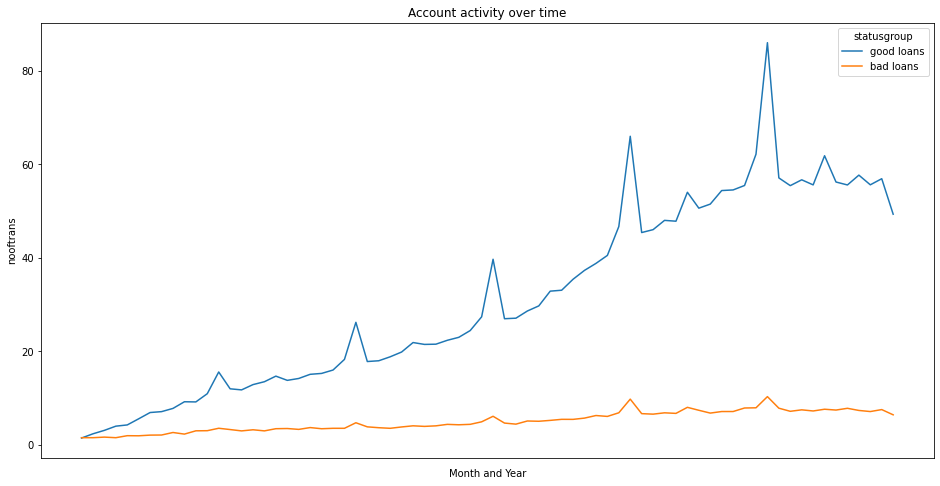

In [29]:
fig = plt.figure(figsize = (16,8))
g = sns.lineplot(data = statuses, x ='M-Y', y = 'nooftrans', hue = 'statusgroup', ci = None)
g.set(xticklabels = [])
g.set(xlabel = 'Month and Year')
g.set(title = 'Account activity over time')
g.tick_params (bottom = False)
plt.show;